<a href="https://colab.research.google.com/github/WizardSC/YOLOv11_Candy/blob/main/YOLOv11_Candy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Option 3. Use my candy detection or coin detection dataset

If you just want to test the process on a pre-made dataset, you can use one of my datasets:

Candy image dataset, which contains 162 pictures of popular candies (Skittles, Snickers, etc)
Coin image dataset, which contains 750 pictures of US coins (pennies, dimes, nickels, and quarters)
Download one of the datasets by running the following code block. I'll use the candy detection dataset as the example for the rest of the notebook.

In [ ]:
!wget -O /content/data.zip https://s3.us-west-1.amazonaws.com/evanjuras.com/resources/candy_data_06JAN25.zip # Candy dataset


--2025-08-07 01:34:57--  https://s3.us-west-1.amazonaws.com/evanjuras.com/resources/candy_data_06JAN25.zip
Resolving s3.us-west-1.amazonaws.com (s3.us-west-1.amazonaws.com)... 52.219.120.176, 16.15.4.34, 52.219.194.40, ...
Connecting to s3.us-west-1.amazonaws.com (s3.us-west-1.amazonaws.com)|52.219.120.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45172966 (43M) [application/zip]
Saving to: ‘/content/data.zip’

/content/data.zip   100%[===================>]  43.08M  98.0MB/s    in 0.4s    

2025-08-07 01:34:58 (98.0 MB/s) - ‘/content/data.zip’ saved [45172966/45172966]



Giải nén .zip ra thành folder

In [ ]:
!unzip -q /content/data.zip -d /content/custom_data


chia tập dữ liệu (ảnh và nhãn) vào 2 folder: train và validation theo tỷ lệ tuỳ chọn (default là 80% train, 20% val)

In [ ]:
# # Split between train and val folders

# from pathlib import Path
# import random
# import os
# import sys
# import shutil
# import argparse


# # Define and parse user input arguments

# parser = argparse.ArgumentParser()
# parser.add_argument('--datapath', help='Path to data folder containing image and annotation files',
#                     required=True)
# parser.add_argument('--train_pct', help='Ratio of images to go to train folder; \
#                     the rest go to validation folder (example: ".8")',
#                     default=.8)

# args = parser.parse_args()

# data_path = args.datapath
# train_percent = float(args.train_pct)

# # Check for valid entries
# if not os.path.isdir(data_path):
#    print('Directory specified by --datapath not found. Verify the path is correct (and uses double back slashes if on Windows) and try again.')
#    sys.exit(0)
# if train_percent < .01 or train_percent > 0.99:
#    print('Invalid entry for train_pct. Please enter a number between .01 and .99.')
#    sys.exit(0)
# val_percent = 1 - train_percent

# # Define path to input dataset
# input_image_path = os.path.join(data_path,'images')
# input_label_path = os.path.join(data_path,'labels')

# # Define paths to image and annotation folders
# cwd = os.getcwd()
# train_img_path = os.path.join(cwd,'data/train/images')
# train_txt_path = os.path.join(cwd,'data/train/labels')
# val_img_path = os.path.join(cwd,'data/validation/images')
# val_txt_path = os.path.join(cwd,'data/validation/labels')

# # Create folders if they don't already exist
# for dir_path in [train_img_path, train_txt_path, val_img_path, val_txt_path]:
#    if not os.path.exists(dir_path):
#       os.makedirs(dir_path)
#       print(f'Created folder at {dir_path}.')


# # Get list of all images and annotation files
# img_file_list = [path for path in Path(input_image_path).rglob('*')]
# txt_file_list = [path for path in Path(input_label_path).rglob('*')]

# print(f'Number of image files: {len(img_file_list)}')
# print(f'Number of annotation files: {len(txt_file_list)}')

# # Determine number of files to move to each folder
# file_num = len(img_file_list)
# train_num = int(file_num*train_percent)
# val_num = file_num - train_num
# print('Images moving to train: %d' % train_num)
# print('Images moving to validation: %d' % val_num)

# # Select files randomly and copy them to train or val folders
# for i, set_num in enumerate([train_num, val_num]):
#   for ii in range(set_num):
#     img_path = random.choice(img_file_list)
#     img_fn = img_path.name
#     base_fn = img_path.stem
#     txt_fn = base_fn + '.txt'
#     txt_path = os.path.join(input_label_path,txt_fn)

#     if i == 0: # Copy first set of files to train folders
#       new_img_path, new_txt_path = train_img_path, train_txt_path
#     elif i == 1: # Copy second set of files to the validation folders
#       new_img_path, new_txt_path = val_img_path, val_txt_path

#     shutil.copy(img_path, os.path.join(new_img_path,img_fn))
#     #os.rename(img_path, os.path.join(new_img_path,img_fn))
#     if os.path.exists(txt_path): # If txt path does not exist, this is a background image, so skip txt file
#       shutil.copy(txt_path,os.path.join(new_txt_path,txt_fn))
#       #os.rename(txt_path,os.path.join(new_txt_path,txt_fn))

#     img_file_list.remove(img_path)


--2025-08-07 01:23:10--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-08-07 01:23:10 (40.7 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]



In [ ]:
from pathlib import Path
import random
import os
import shutil

def split_dataset(datapath: str, train_pct: float = 0.8):
    # Validate đầu vào
    if not os.path.isdir(datapath):
        raise ValueError(f"❌ Đường dẫn không tồn tại: {datapath}")
    if train_pct < 0.01 or train_pct > 0.99:
        raise ValueError("❌ train_pct phải nằm trong khoảng 0.01 đến 0.99")

    input_image_path = os.path.join(datapath, 'images')
    input_label_path = os.path.join(datapath, 'labels')

    # Output path chính xác bạn yêu cầu
    output_base = "/content/data"
    train_img_path = os.path.join(output_base, 'train/images')
    train_lbl_path = os.path.join(output_base, 'train/labels')
    val_img_path   = os.path.join(output_base, 'validation/images')
    val_lbl_path   = os.path.join(output_base, 'validation/labels')

    # Tạo folder
    for path in [train_img_path, train_lbl_path, val_img_path, val_lbl_path]:
        os.makedirs(path, exist_ok=True)

    # Lấy danh sách ảnh
    img_files = list(Path(input_image_path).rglob('*.*'))
    print(f"📷 Tổng số ảnh: {len(img_files)}")

    random.shuffle(img_files)
    train_count = int(len(img_files) * train_pct)

    train_imgs = img_files[:train_count]
    val_imgs   = img_files[train_count:]

    def copy_files(img_list, dest_img_dir, dest_lbl_dir):
        for img_path in img_list:
            img_name = img_path.name
            base_name = img_path.stem
            txt_path = os.path.join(input_label_path, f"{base_name}.txt")

            shutil.copy(img_path, os.path.join(dest_img_dir, img_name))
            if os.path.exists(txt_path):
                shutil.copy(txt_path, os.path.join(dest_lbl_dir, f"{base_name}.txt"))

    copy_files(train_imgs, train_img_path, train_lbl_path)
    copy_files(val_imgs, val_img_path, val_lbl_path)

    print(f"✅ Hoàn tất chia dữ liệu:")
    print(f"   - Train: {len(train_imgs)} ảnh")
    print(f"   - Validation: {len(val_imgs)} ảnh")


In [ ]:
split_dataset(datapath="/content/custom_data", train_pct=0.9)


📷 Tổng số ảnh: 162
✅ Hoàn tất chia dữ liệu:
   - Train: 145 ảnh
   - Validation: 17 ảnh


# 3.&nbsp;Install Requirements (Ultralytics)

Next, we'll install the Ultralytics library in this Google Colab instance. This Python library will be used to train the YOLO model.

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


# 4. Configure Training


Tạo yaml file

---


Hãy đảm bảo rằng bạn có một file labelmap nằm tại custom_data/classes.txt.
Nếu sử dụng Label Studio, thì file đó có thể đã có sẵn.

Nếu tự tạo bộ dữ liệu theo cách khác, bạn có thể cần tự tạo thủ công file classes.txt này

In [ ]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 11
names:
- MMs_peanut
- MMs_regular
- airheads
- gummy_worms
- milky_way
- nerds
- skittles
- snickers
- starbust
- three_musketeers
- twizzlers


# 5. Train model


In [ ]:
from ultralytics import YOLO

# Khởi tạo model YOLOv11
model = YOLO("yolo11s.pt")  # Load pre-trained model

# Huấn luyện mô hình
model.train(
    data="/content/data.yaml",  # đường dẫn tới file cấu hình data.yaml
    epochs=60,                  # số epoch
    imgsz=640                   # kích thước ảnh
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytic

 22                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 23        [16, 19, 22]  1    823665  ultralytics.nn.modules.head.Detect           [11, [128, 256, 512]]         
YOLO11s summary: 181 layers, 9,432,049 parameters, 9,432,033 gradients, 21.6 GFLOPs

Transferred 493/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 93.0±33.0 MB/s, size: 326.8 KB)


train: Scanning /content/data/train/labels... 145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<00:00, 373.14it/s]

train: New cache created: /content/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 59.8±16.7 MB/s, size: 334.5 KB)


val: Scanning /content/data/validation/labels... 17 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<00:00, 231.01it/s]

val: New cache created: /content/data/validation/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      4.02G     0.8597       4.28       1.07          3        640: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         17         78     0.0888      0.343      0.124      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      4.06G     0.8971      3.583      1.229          1        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         17         78      0.709      0.434      0.535      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60       4.1G     0.7139      2.278      1.018          1        640: 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         17         78      0.519      0.755      0.658      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      4.14G     0.6442      1.497      0.955          1        640: 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         17         78      0.729      0.863      0.904      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      4.18G     0.6341      1.161     0.9311         10        640: 100%|██████████| 10/10 [00:02<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         17         78      0.917       0.82      0.935      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      4.24G     0.6671      1.027     0.9586          4        640: 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         17         78      0.796      0.866      0.927      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      4.26G     0.6411      1.193     0.9237          1        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


                   all         17         78      0.801      0.888      0.948      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      4.32G     0.6363     0.9226     0.9333          6        640: 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         17         78      0.781      0.848      0.954      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      4.36G     0.6721     0.7969     0.9436          6        640: 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         17         78      0.898       0.94      0.973      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      4.43G     0.6405     0.7594     0.9636          3        640: 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


                   all         17         78      0.844      0.864      0.947       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      4.53G     0.5914     0.7146     0.9298          1        640: 100%|██████████| 10/10 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         17         78        0.9      0.906      0.959      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      4.57G      0.618      0.653       0.91         12        640: 100%|██████████| 10/10 [00:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         17         78      0.889      0.933      0.967      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      4.61G     0.7388     0.7993     0.9861          7        640: 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


                   all         17         78      0.899      0.943      0.965       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      4.65G     0.5979     0.6113     0.9149          6        640: 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         17         78        0.9      0.921      0.961       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      4.73G     0.6129     0.5977     0.9793          3        640: 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         17         78      0.885      0.918      0.962      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      4.77G     0.6222     0.6064     0.9228          5        640: 100%|██████████| 10/10 [00:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         17         78      0.922      0.917      0.957      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      4.81G     0.5756     0.5143     0.9292          6        640: 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         17         78      0.925      0.935      0.955      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      4.85G     0.5605      0.486     0.9056          9        640: 100%|██████████| 10/10 [00:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]


                   all         17         78      0.904      0.956      0.985      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      4.92G     0.6701     0.5765     0.9809          2        640: 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         17         78      0.953       0.95       0.98      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      4.96G     0.5902     0.5391     0.9361          6        640: 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         17         78       0.95       0.97      0.974      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      5.05G     0.5543     0.5252      0.919         10        640: 100%|██████████| 10/10 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         17         78      0.942      0.962      0.974      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      5.09G     0.5286     0.4995     0.8918          4        640: 100%|██████████| 10/10 [00:02<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         17         78      0.948      0.945      0.982      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      5.13G     0.6073     0.5183     0.9286          3        640: 100%|██████████| 10/10 [00:03<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         17         78      0.931      0.973      0.991      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      5.17G     0.5635     0.4811     0.9177         12        640: 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         17         78      0.926      0.945      0.968       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      5.25G     0.5803     0.5241     0.9079         11        640: 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         17         78       0.93      0.953      0.961      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      5.29G     0.5518     0.4913     0.9208          1        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         17         78      0.915      0.971      0.976      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      5.36G     0.5279     0.4719     0.9232          9        640: 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         17         78      0.917      0.952      0.983      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60       5.4G     0.5408     0.4375     0.9124          9        640: 100%|██████████| 10/10 [00:02<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


                   all         17         78      0.911      0.969      0.989      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      5.44G     0.5991     0.5385     0.9689          4        640: 100%|██████████| 10/10 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         17         78      0.928       0.97      0.983      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      5.52G     0.5801     0.4966     0.9114          1        640: 100%|██████████| 10/10 [00:03<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         17         78      0.937      0.932      0.981      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      5.56G     0.5557     0.6005     0.9146          1        640: 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         17         78      0.912      0.917      0.962      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      5.65G     0.5331     0.4571     0.9104          2        640: 100%|██████████| 10/10 [00:02<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         17         78      0.936      0.955      0.974      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      5.69G     0.5079     0.4356     0.8952         12        640: 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         17         78      0.937      0.964      0.976      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      5.73G     0.5102     0.4351      0.897         17        640: 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         17         78      0.933      0.929       0.96      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      5.77G     0.4942     0.4196     0.9001         11        640: 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         17         78      0.938      0.969      0.975      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      5.86G     0.4738     0.4029     0.8743         10        640: 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         17         78      0.917      0.982      0.994      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      5.89G     0.5164     0.4592     0.9157          7        640: 100%|██████████| 10/10 [00:03<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         17         78      0.953      0.976      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      5.94G     0.5297     0.4061     0.9414          5        640: 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all         17         78      0.968      0.975      0.993      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      5.97G     0.5005     0.4118     0.9213          6        640: 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all         17         78      0.953      0.988      0.993      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      6.06G     0.4695     0.3907     0.8743         10        640: 100%|██████████| 10/10 [00:02<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         17         78      0.949      0.977      0.978      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60       6.1G     0.4819     0.4268     0.8976          2        640: 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         17         78      0.938      0.974      0.985      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      6.14G     0.4782     0.3764     0.8769          7        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         17         78      0.967      0.972      0.984      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      6.22G     0.4551     0.3418     0.8743         11        640: 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


                   all         17         78      0.959      0.975      0.985      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      6.26G     0.4645     0.3748     0.8782         20        640: 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         17         78      0.958      0.983      0.984      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60       6.3G     0.4634     0.3675     0.8758         16        640: 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         17         78      0.957      0.986      0.984      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      6.38G     0.4476     0.3439     0.8865          5        640: 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         17         78      0.966      0.986      0.984      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      6.41G     0.4801      0.428     0.9183          7        640: 100%|██████████| 10/10 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         17         78      0.964      0.989      0.985      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60       6.5G     0.4383     0.3257     0.8678         13        640: 100%|██████████| 10/10 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]


                   all         17         78      0.961      0.985      0.987      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      6.53G     0.4629     0.3588     0.9048          4        640: 100%|██████████| 10/10 [00:02<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         17         78      0.966      0.978      0.992      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      6.63G     0.4327     0.3242     0.8723          6        640: 100%|██████████| 10/10 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         17         78      0.954      0.985      0.991      0.906


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      6.71G     0.3906     0.2928     0.8224          6        640: 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         17         78      0.946      0.982      0.986      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      6.75G     0.4165      0.352     0.8365          2        640: 100%|██████████| 10/10 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         17         78      0.945      0.977      0.985      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      6.79G     0.3761       0.28     0.8316          7        640: 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         17         78      0.948      0.979      0.988      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      6.83G     0.3713     0.4001     0.8325          4        640: 100%|██████████| 10/10 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all         17         78       0.95       0.98      0.988      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      6.87G     0.3382     0.2708     0.8364          6        640: 100%|██████████| 10/10 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         17         78       0.95       0.98      0.989      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      6.91G     0.3669     0.2727     0.8093          1        640: 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


                   all         17         78      0.949       0.98      0.989      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      6.95G     0.3635      0.265     0.8238          4        640: 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         17         78      0.949      0.979       0.99      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      7.02G     0.4399     0.3441     0.8085          1        640: 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all         17         78      0.958      0.979      0.992      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      7.06G     0.3434      0.248      0.811          5        640: 100%|██████████| 10/10 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all         17         78       0.96      0.981      0.992      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      7.13G      0.329     0.2742     0.8084          6        640: 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         17         78      0.959      0.982      0.993      0.904



60 epochs completed in 0.064 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,417,057 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         17         78      0.945      0.976      0.985      0.912
            MMs_peanut          9          9      0.944      0.889      0.984      0.939
           MMs_regular          7          7      0.863          1      0.978       0.85
              airheads          8         11      0.908      0.909      0.915       0.87
           gummy_worms          4          4      0.971          1      0.995      0.961
             milky_way          4          4      0.784          1      0.995      0.914
                 nerds          7          9      0.986          1      0.995      0.849
              skittles          8          9      0.991          1      0.995      0.976
              snickers          4          5      0.989          1      0.995       0.89
              starbust          6          6      0.977          1      0.995      0.911
      three_musketeers          4          4      0.986          1      0.995      0.926
             twizzler

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79fb81501b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

# 6. Test model

In [ ]:
from ultralytics import YOLO

# Load model đã được train xong
model = YOLO("runs/detect/train/weights/best.pt")

# Dự đoán trên thư mục chứa ảnh
model.predict(
    source="data/validation/images",  # thư mục chứa ảnh
    save=True                          # lưu ảnh kết quả đã vẽ bounding boxes
)



image 1/17 /content/data/validation/images/0414530e-candy_58.jpg: 384x640 1 MMs_peanut, 1 milky_way, 1 starbust, 2 twizzlerss, 46.5ms
image 2/17 /content/data/validation/images/0cd769b7-candy_18.jpg: 384x640 1 MMs_peanut, 1 MMs_regular, 1 milky_way, 1 skittles, 11.5ms
image 3/17 /content/data/validation/images/356f8bbd-candy_53.jpg: 384x640 1 MMs_peanut, 1 skittles, 1 three_musketeers, 1 twizzlers, 10.8ms
image 4/17 /content/data/validation/images/3b1b0191-candy_30.jpg: 384x640 2 MMs_regulars, 1 gummy_worms, 1 snickers, 1 starbust, 1 twizzlers, 10.8ms
image 5/17 /content/data/validation/images/3fa5ff26-candy_27.jpg: 384x640 1 MMs_regular, 1 gummy_worms, 2 skittless, 1 snickers, 1 twizzlers, 10.8ms
image 6/17 /content/data/validation/images/4e7bd660-candy_11.jpg: 384x640 1 MMs_peanut, 1 gummy_worms, 1 snickers, 1 three_musketeers, 10.9ms
image 7/17 /content/data/validation/images/516476d5-candy_115.jpg: 480x640 1 MMs_peanut, 1 airheads, 1 milky_way, 1 nerds, 1 twizzlers, 47.1ms
image 8

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'MMs_peanut', 1: 'MMs_regular', 2: 'airheads', 3: 'gummy_worms', 4: 'milky_way', 5: 'nerds', 6: 'skittles', 7: 'snickers', 8: 'starbust', 9: 'three_musketeers', 10: 'twizzlers'}
 obb: None
 orig_img: array([[[63, 48, 39],
         [57, 44, 36],
         [51, 35, 36],
         ...,
         [34, 26, 26],
         [33, 28, 29],
         [30, 27, 29]],
 
        [[59, 41, 34],
         [59, 43, 37],
         [56, 40, 41],
         ...,
         [43, 34, 31],
         [45, 37, 38],
         [46, 39, 42]],
 
        [[67, 44, 42],
         [65, 44, 43],
         [61, 43, 44],
         ...,
         [46, 31, 29],
         [43, 29, 31],
         [43, 29, 31]],
 
        ...,
 
        [[69, 37, 26],
         [69, 40, 33],
         [67, 40, 44],
         ...,
         [39, 34, 35],
         [40, 37, 39],
         [39, 38, 42]],
 
        [[63, 

Hiển thị 10 hình ảnh đầu tiên

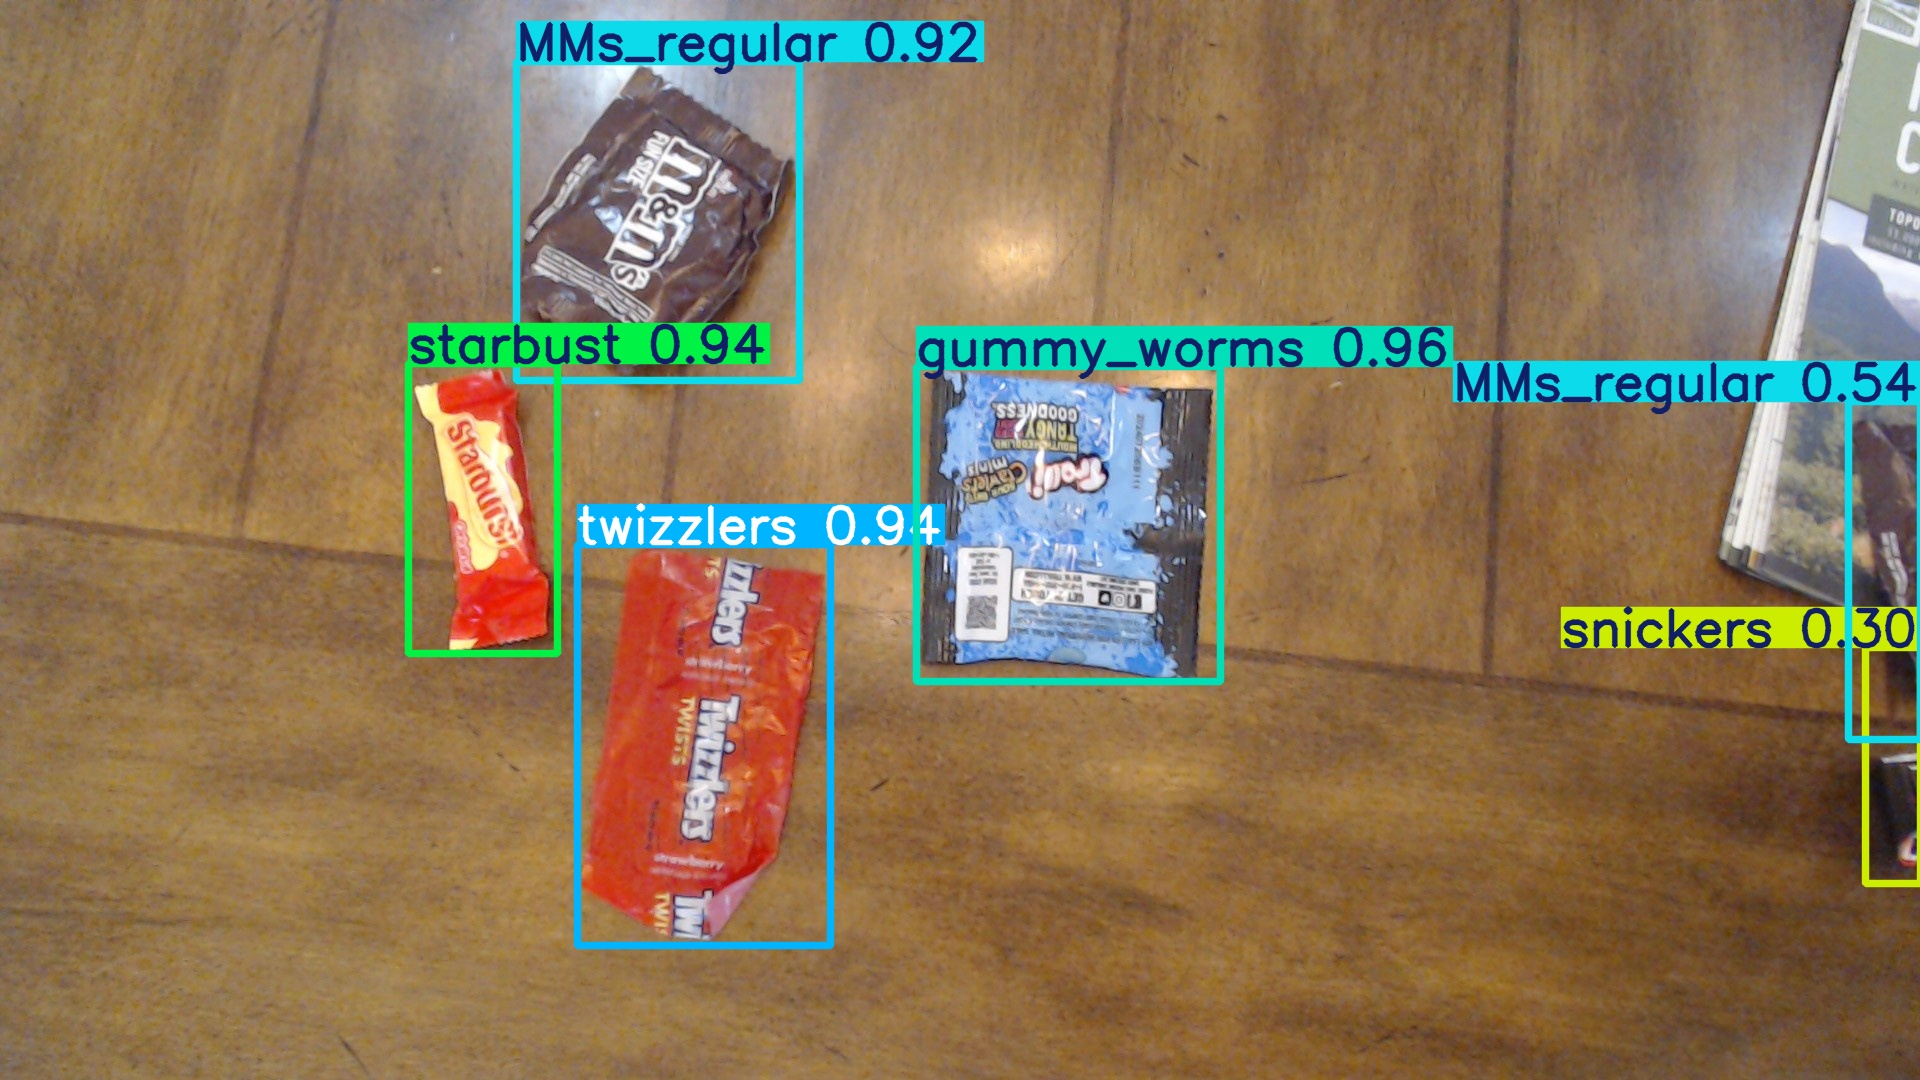

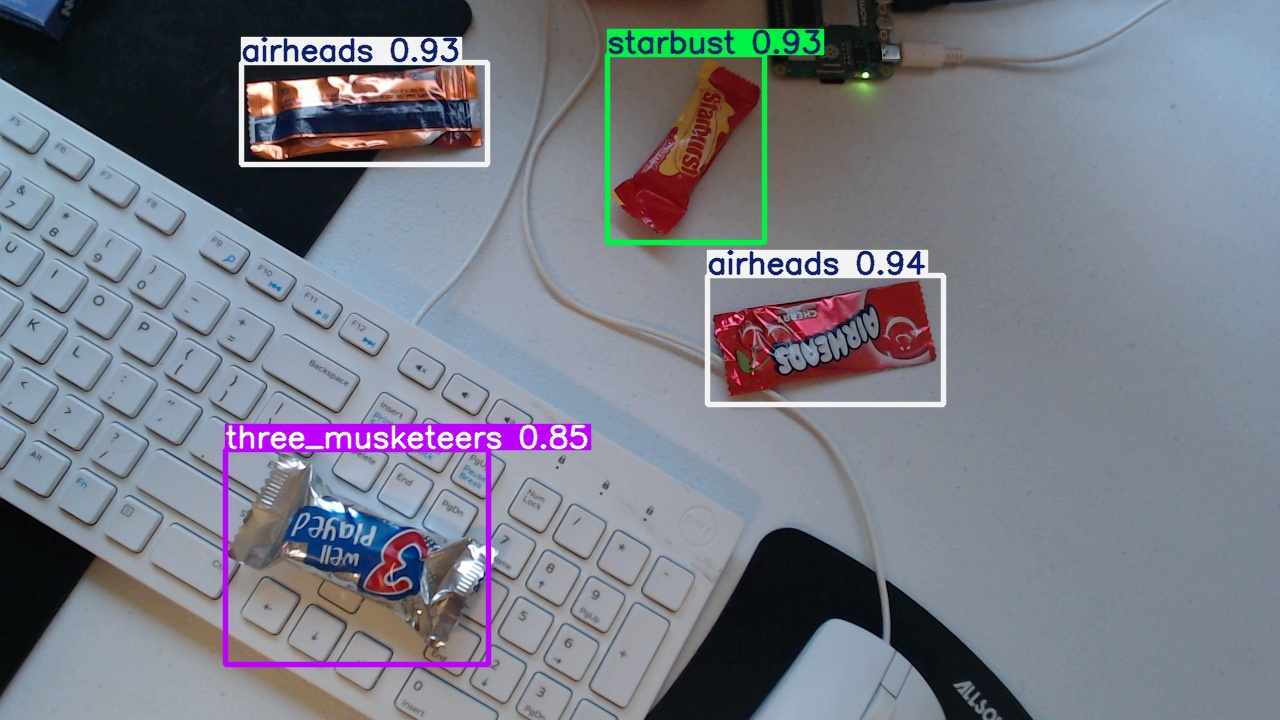

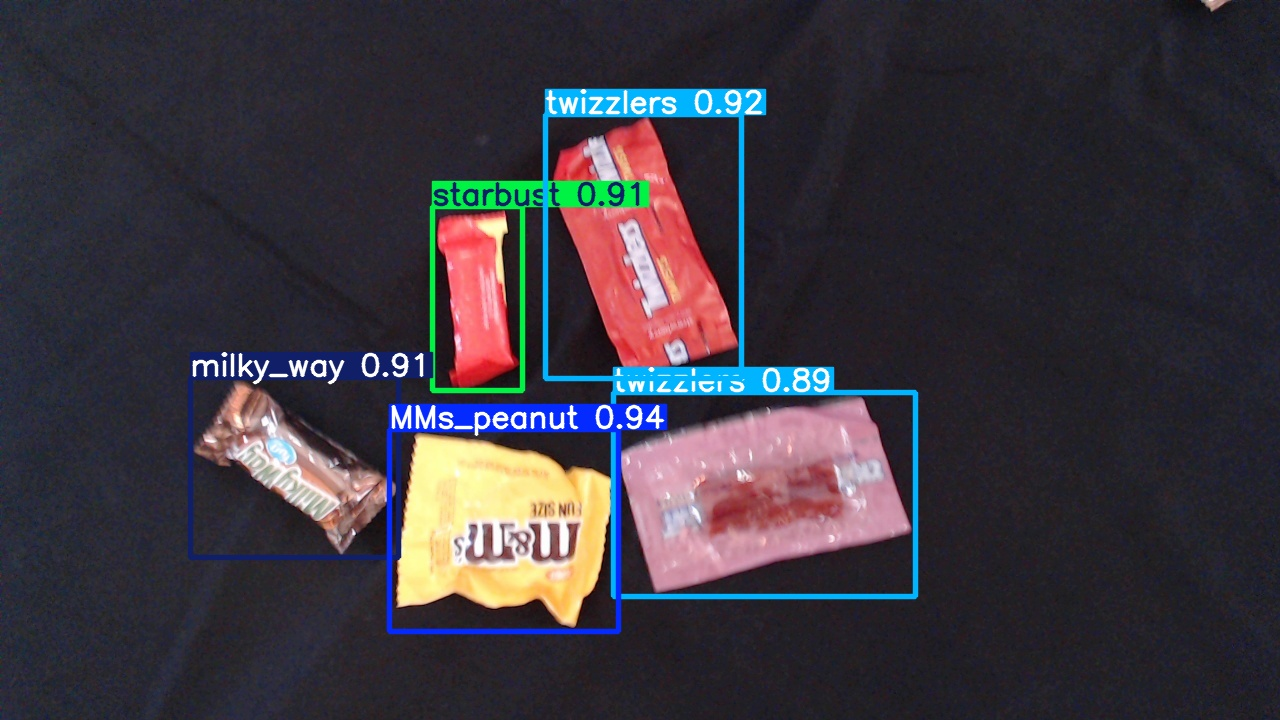

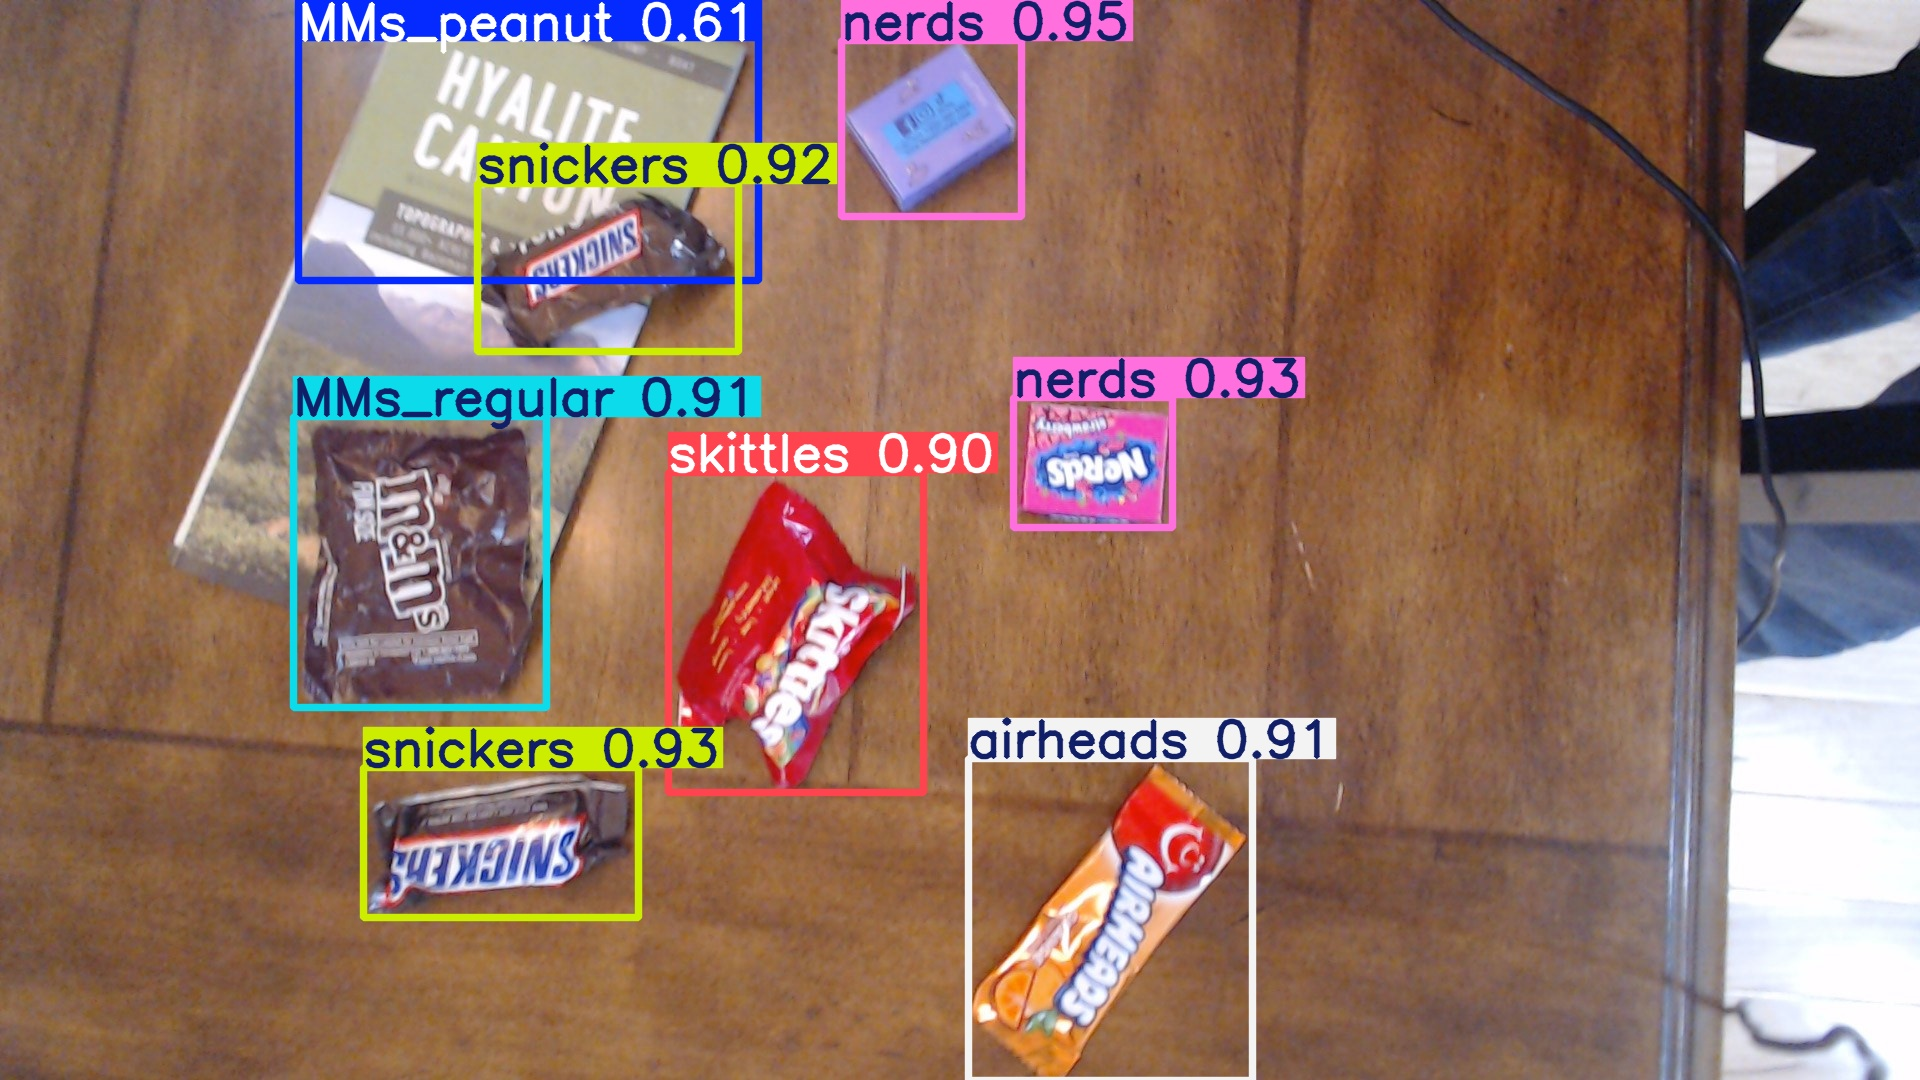

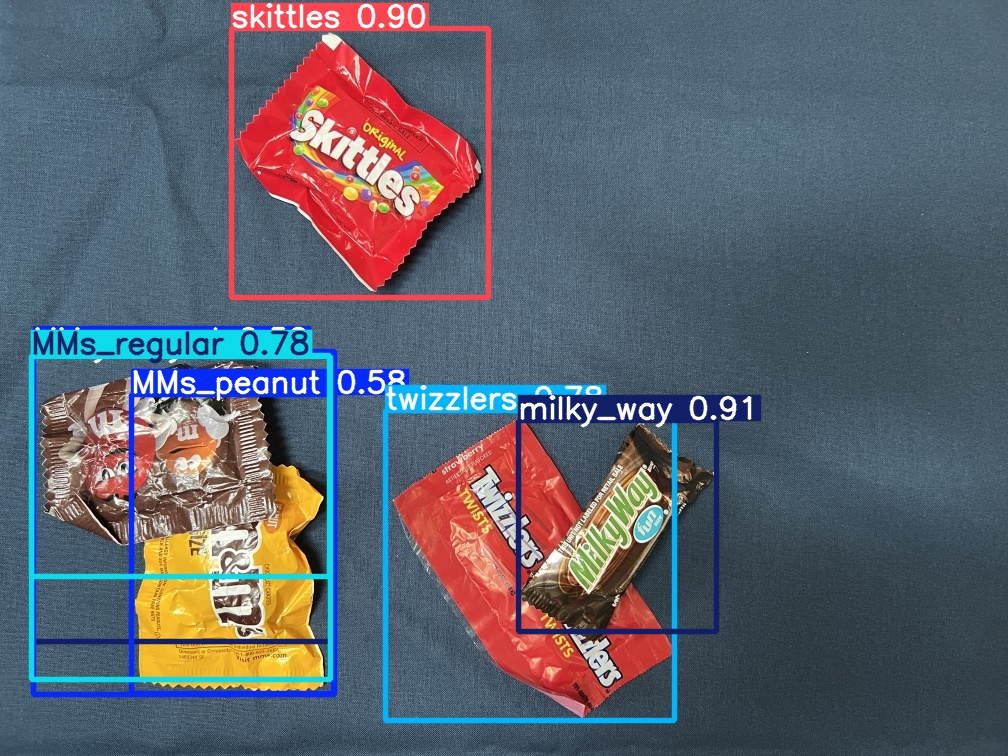

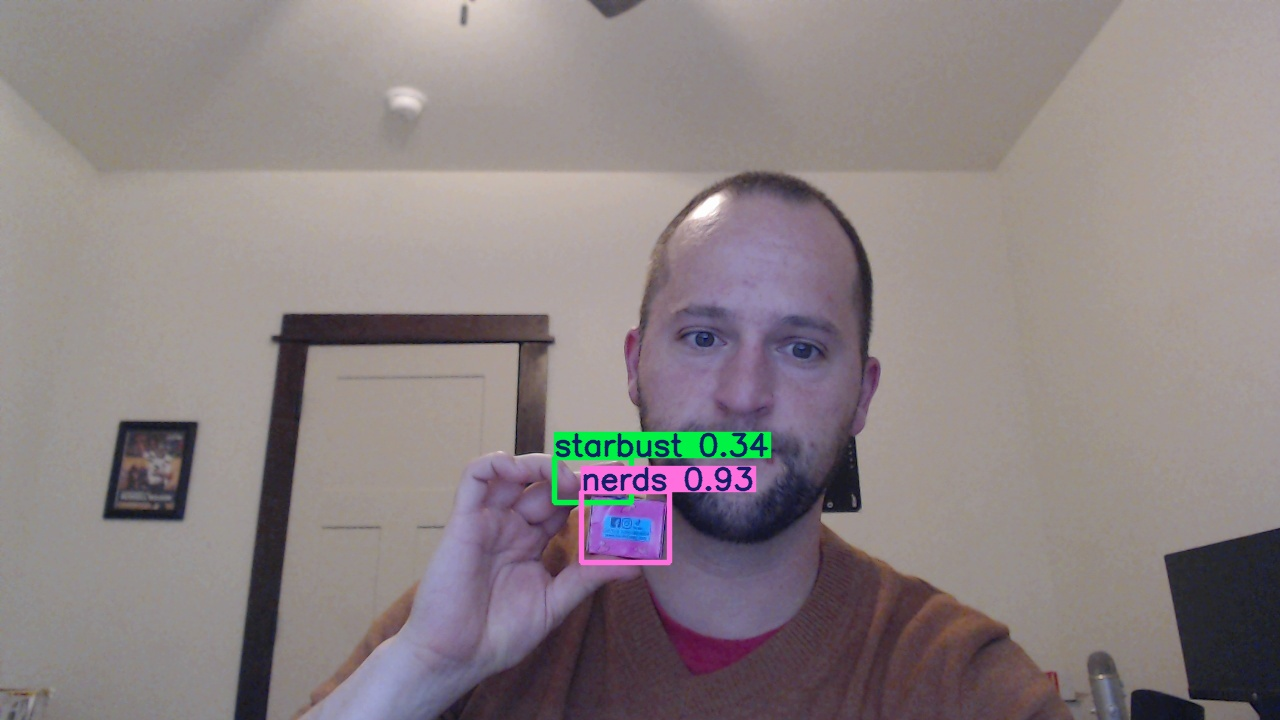

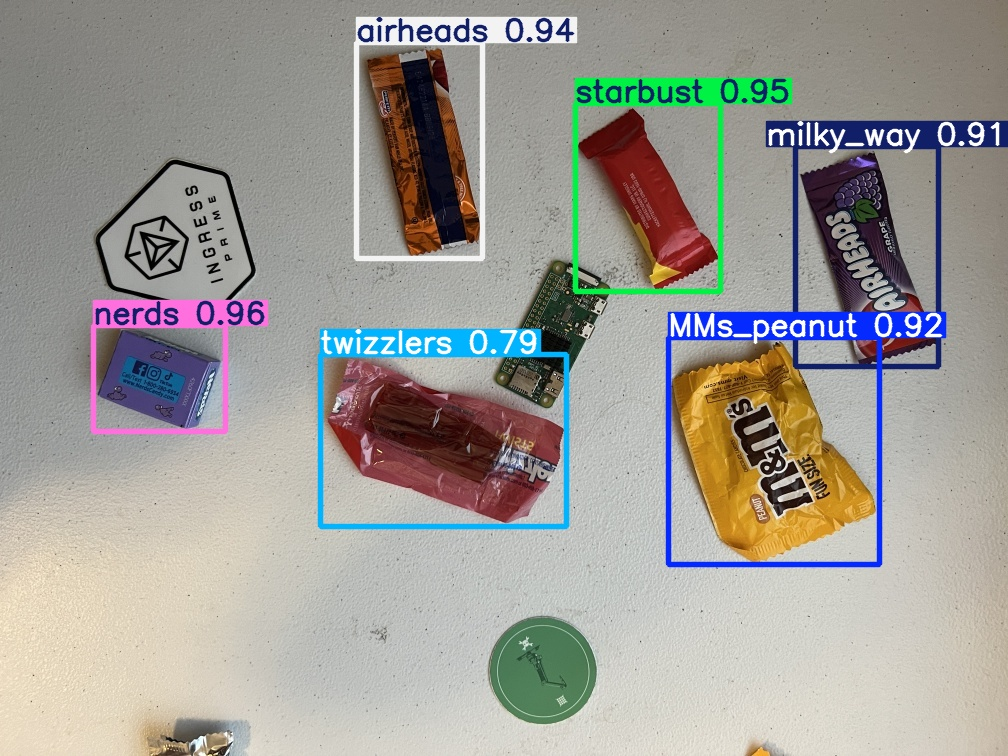

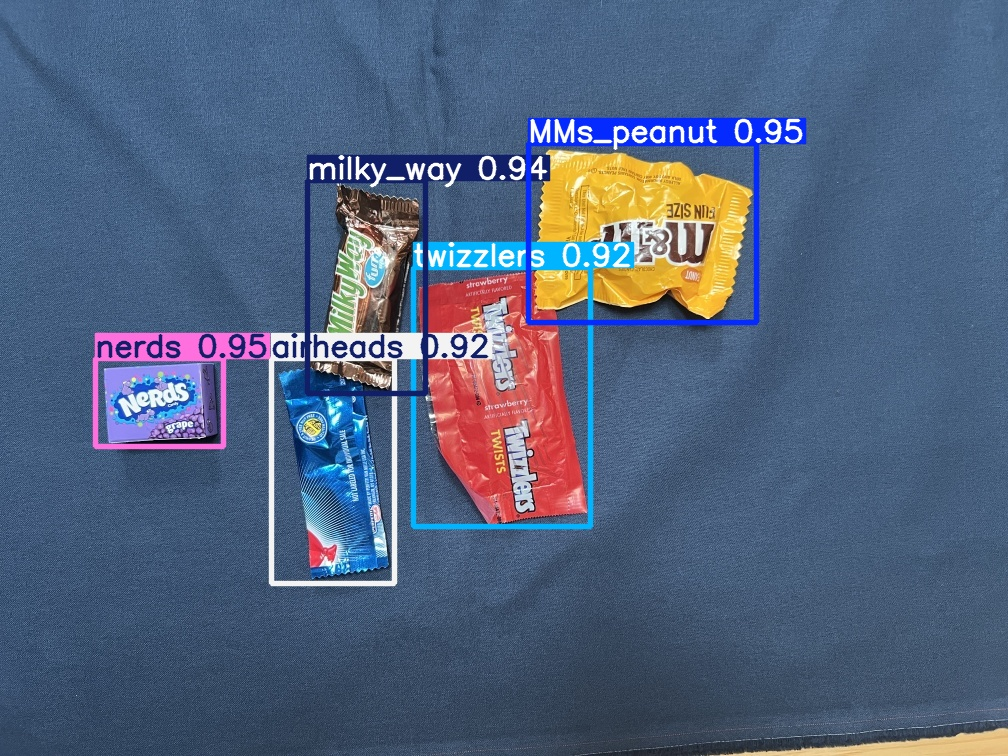

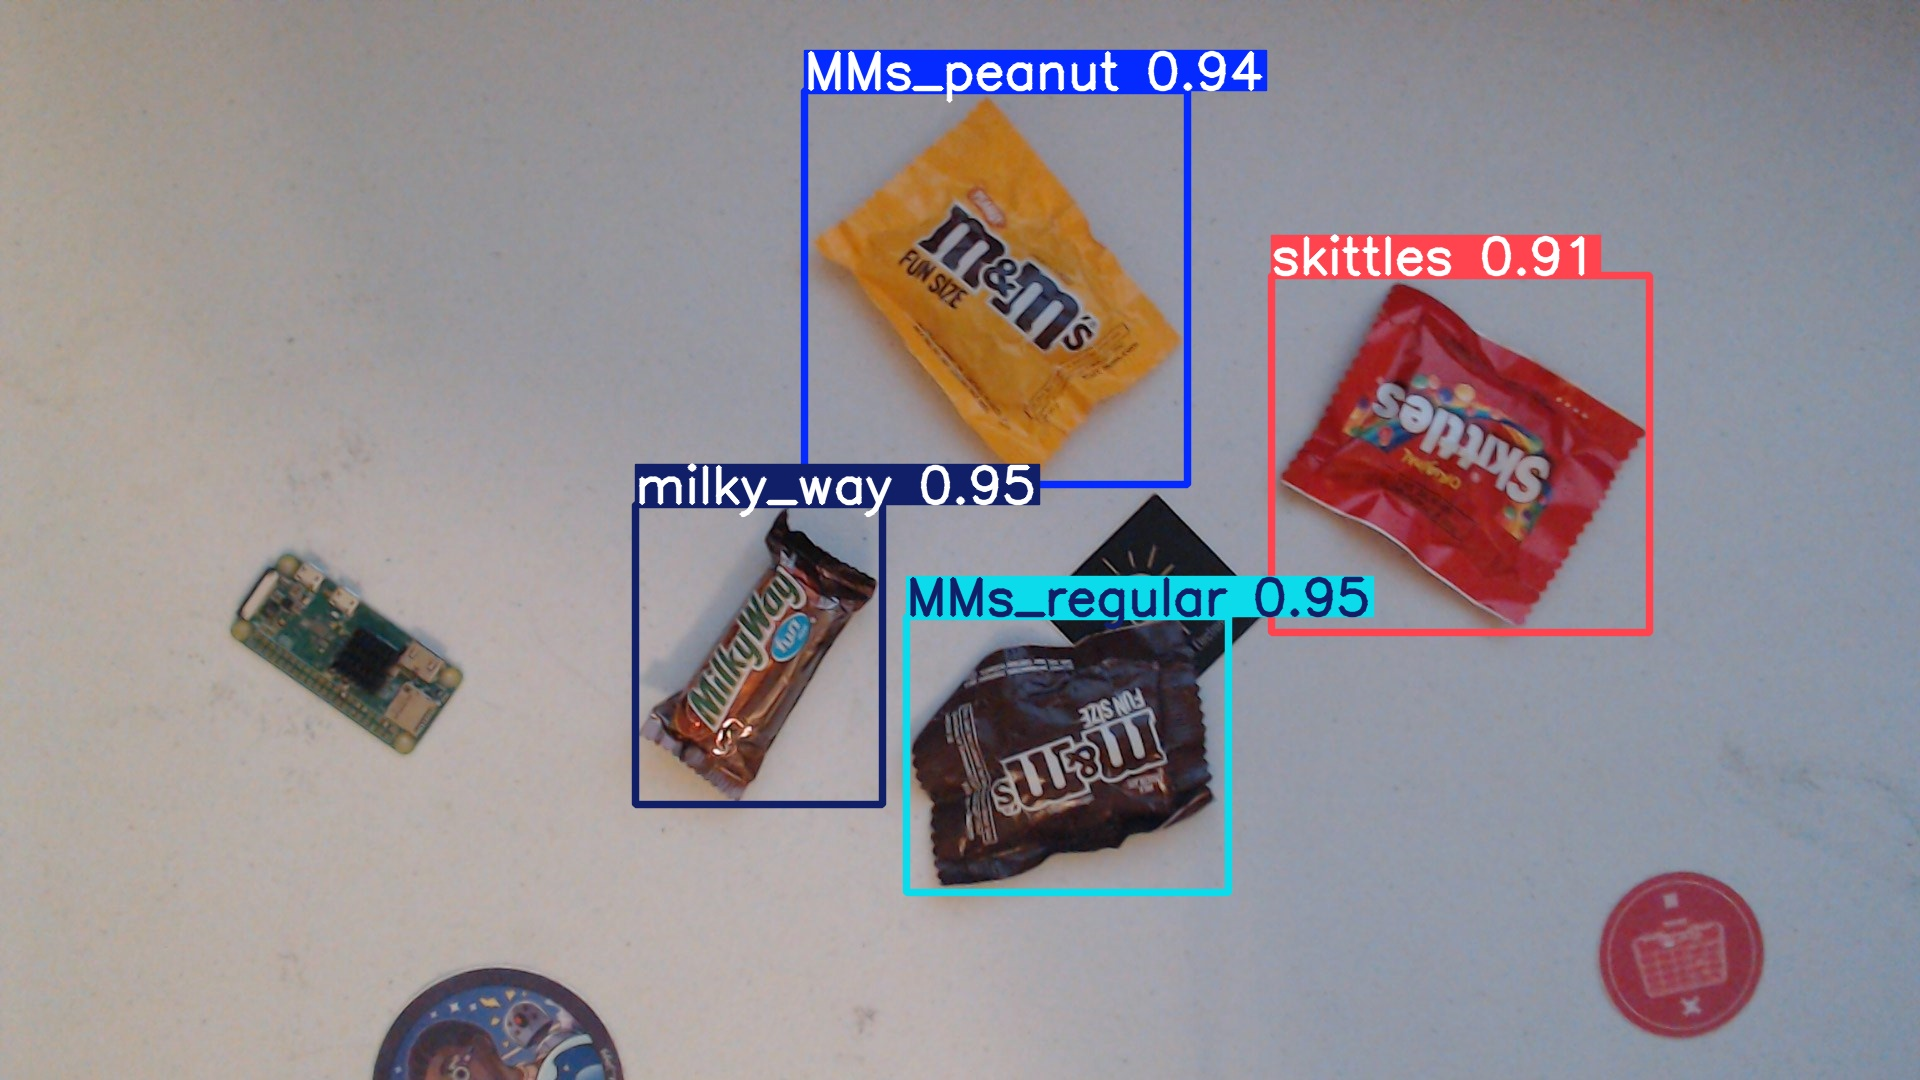

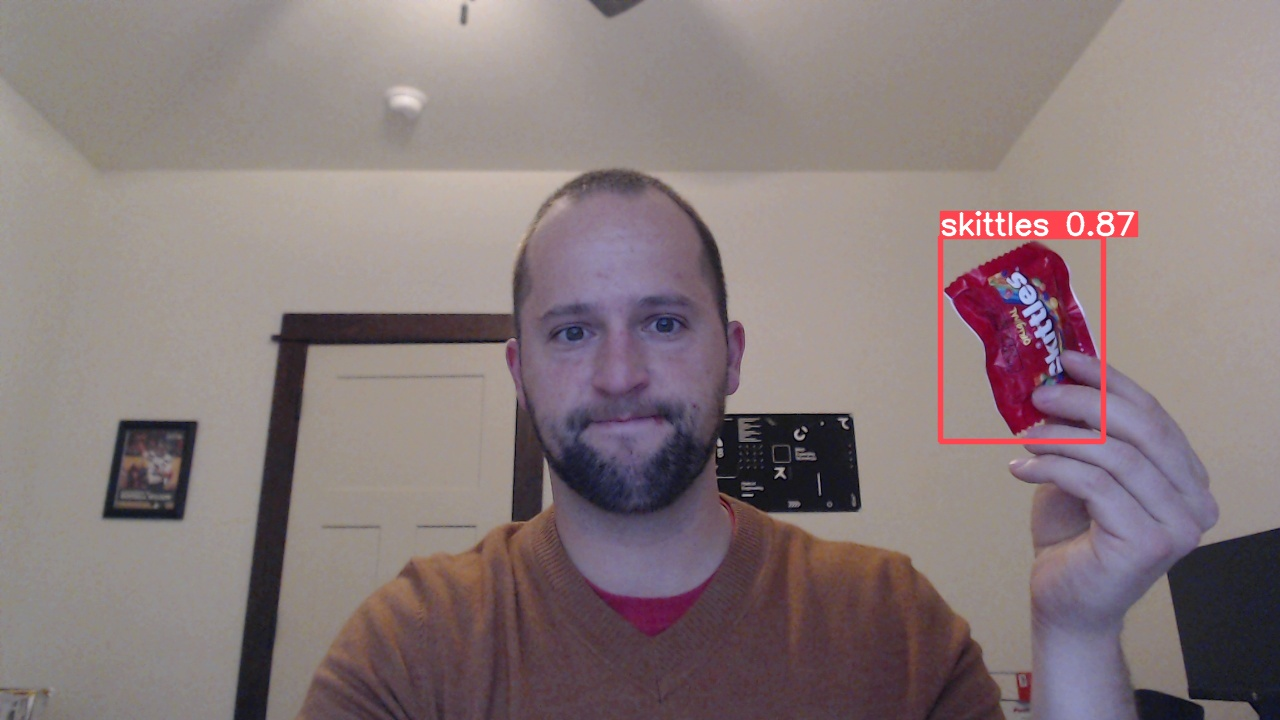

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


# 7. Deploy model

Downloading YOLO model

In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/BoxPR_curve.png (deflated 19%)
  adding: train/args.yaml (deflated 53%)
  adding: train/train_batch2.jpg (deflated 4%)
  adding: train/labels_correlogram.jpg (deflated 42%)
  adding: train/train_batch500.jpg (deflated 8%)
  adding: train/labels.jpg (deflated 29%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/BoxP_curve.png (deflated 10%)
  adding: train/BoxR_curve.png (deflated 12%)
  adding: train/train_batch1.jpg (deflated 4%)
  adding: train/confusion_matrix_normalized.png (deflated 20%)
  adding: train/BoxF1_curve.png (deflated 8%)
  adding: train/train_batch501.jpg (deflated 14%)
  adding: train/val_batch0_pred.jpg (deflated 7%)
  adding: train/results.csv (deflated 62%)
  adding: train/results.png (deflated 7%)
  adding: train/train_batch502.jpg (deflated 10%)
  adding: train/train_bat

In [ ]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>